In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
food = pd.read_csv("food_cleaned.csv")
food["date"] = pd.to_datetime(food["date"])
company = pd.read_csv("avg_week_donation_raw.csv")

### Distribution of Number of Pounds

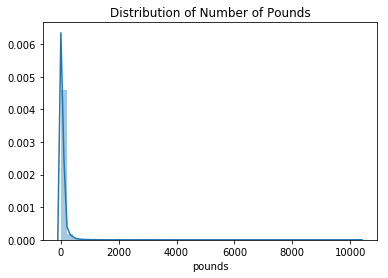

In [3]:
sns.distplot(food["pounds"]);
plt.title("Distribution of Number of Pounds");

$\text{Have a couple outliers that realy skews the data, apply a log transformation to get a better idea of what the data looks like}$

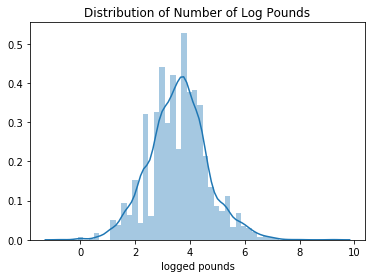

In [4]:
sns.distplot(np.log(food["pounds"]));
plt.title("Distribution of Number of Log Pounds");
plt.xlabel("logged pounds");

In [5]:
np.exp(np.log(food["pounds"]).mean())

35.820888279683096

In [6]:
max(food["pounds"])

10312.0

\begin{align*}
&- \text{Distribution of logged pounds kinda looks normal with mean around 3.5, which is about 33 pounds when exponentiated}\\
&- \text{Median donation is 36 pounds}
\end{align*}

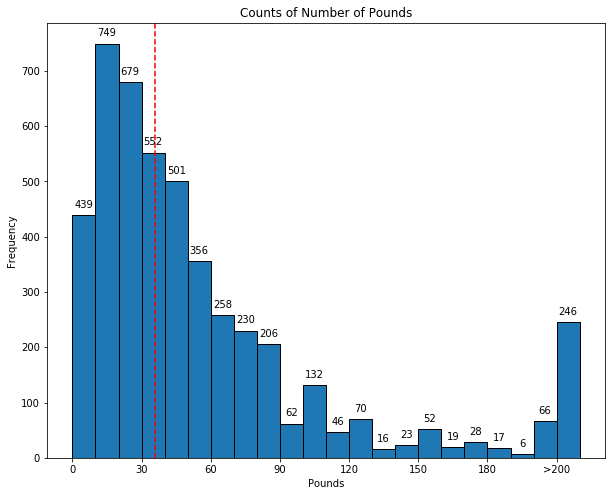

In [7]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
       110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]
food["pounds"].clip(upper = 220).plot.hist(bins = bins, edgecolor = "black", figsize = (10, 8));
plt.title("Counts of Number of Pounds");
ax = plt.gca()
ax.set_xticks([0, 30, 60, 90, 120, 150, 180, 210]);
ax.set_xticklabels([0, 30, 60, 90, 120, 150, 180, ">200"]);
plt.xlabel("Pounds");
plt.axvline(x = food["pounds"].median(), color = "r", linestyle = "--");
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y + 10), ha='center', va='bottom', fontsize = 10)

$\text{Most food donations are between 10-30 pounds}$

### Distribution of Counts and Pounds for Weekday


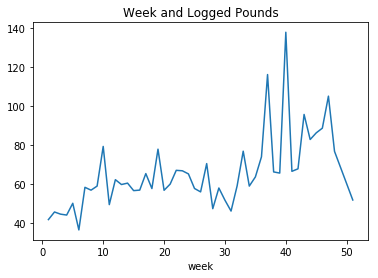

In [8]:
food["date"] = pd.to_datetime(food["date"])
food["week"] = food["date"].dt.week.apply(lambda x: x - 25 if x > 25
                                                        else x + 26)
food.groupby(food["week"])["pounds"].agg(np.mean).plot();
plt.title("Week and Logged Pounds");

\begin{align*}
&- \text{Review how to perform time series analysis in order to demonstrate whether or not there is a trend. Fit a model and then look at distribution of residuals.}\\
&- \text{From initial glance, appears to be some seasonality (need to review fourier transform)}\\
&- \text{Appears to be an upward trend, so more food donations}
\end{align*}

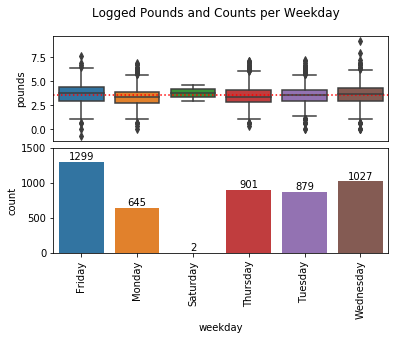

In [9]:
#food["year"] = food["year"].astype("int")
fig, axs = plt.subplots(nrows=2)
#food["month_year"] = food["date"].apply(lambda x: x.strftime("%B-%Y"))
sns.boxplot(
    x=food['weekday'].sort_values(),
    y= np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x=food['weekday'].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 1500)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Counts per Weekday");

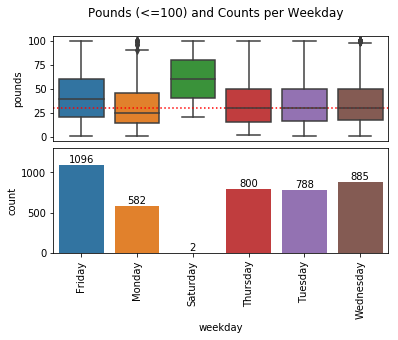

In [10]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[food["pounds"] <= 100]["weekday"].sort_values(),
    y=food[food["pounds"] <= 100]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x=food[food["pounds"] <= 100]["weekday"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food['pounds'] <= 100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 1300)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<=100) and Counts per Weekday");

\begin{align*}
&- \text{Most frequent pickup day is Friday}
\\ &- \text{Of the pickups between 0 and 100 pounds of food, Fridays have a slightly higher average than the other days.}
\\ &- \text{Saturday only has 2 entries, so not very comparable to the other days.}
\end{align*}

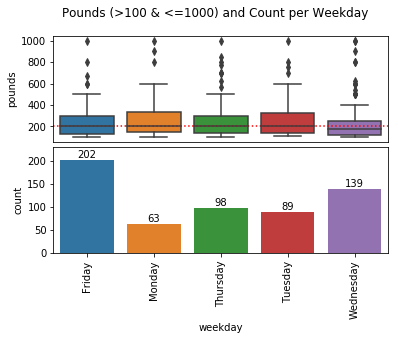

In [11]:
fig, axs = plt.subplots(nrows=2)


sns.boxplot(
    x=food[(food["pounds"] > 100) & (food["pounds"] <= 1000)]['weekday'].sort_values(),
    y=food[(food["pounds"] > 100) & (food["pounds"] <= 1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x= food[(food["pounds"] > 100) & (food["pounds"] <= 1000)]["weekday"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food['pounds'] > 100) & (food['pounds'] <= 1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 230)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.05)
plt.suptitle("Pounds (>100 & <=1000) and Count per Weekday");

\begin{align*}
&- \text{Fridays also have the most pickups for large food pickups.}
\\ &- \text{Not much variation between the means of each of the days.}
\end{align*}

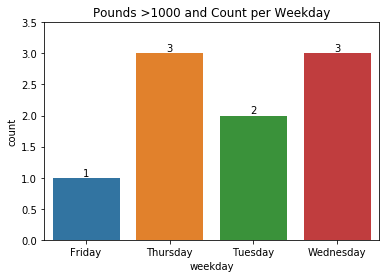

In [12]:
ax = sns.countplot(
    x=food[(food["pounds"] > 1000)]["weekday"].sort_values(),
)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 3.5);
plt.title("Pounds >1000 and Count per Weekday");

### Distribution of Counts and Pounds for month

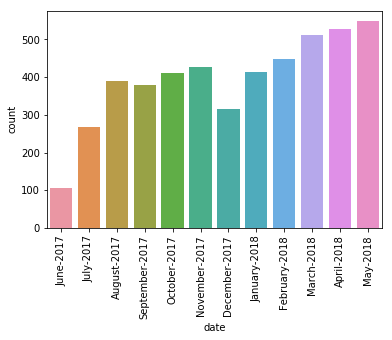

In [13]:
food["month_year"] = food["date"].apply(lambda x: x.strftime("%B-%Y"))
ax = sns.countplot(food["date"].apply(lambda x: x.strftime("%B-%Y")))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90);


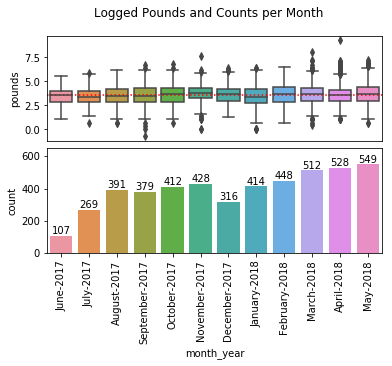

In [14]:
#food["year"] = food["year"].astype("int")
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food['month_year'],
    y= np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x='month_year',
    data=food,
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 650)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Counts per Month");

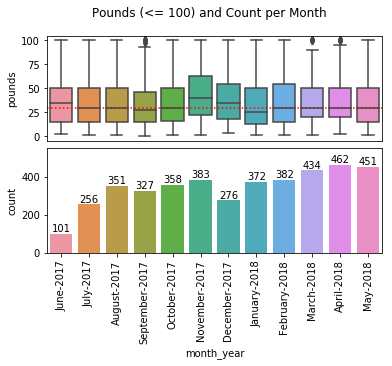

In [15]:
#food["year"] = food["year"].astype("int")
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food["pounds"] <= 100)]['month_year'],
    y=food[(food["pounds"] <= 100)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='month_year',
    data=food[(food["pounds"] <= 100)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] <= 100)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 550)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<= 100) and Count per Month");

\begin{align*}
&- \text{June, November, and December have slightly higher average number of pounds being picked up between 0-100 pounds}\\
&- \text{June was the beginning of the data collection, May was the month with the last data entry}
\end{align*}

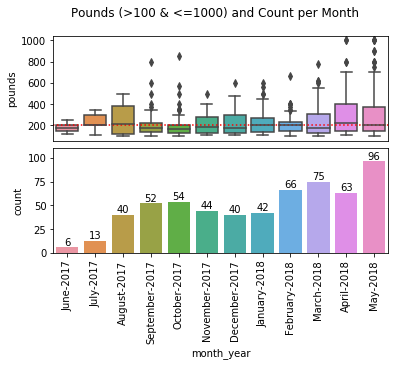

In [16]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]['month_year'],
    y=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='month_year',
    data=food[(food['pounds'] > 100) & (food["pounds"] <=1000)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 110)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <=1000) and Count per Month");

\begin{align*}
& - \text{July has the highest average for number of pounds being picked up. But only has 14 pickups so probably not accurate to say that there is more food waste in July.} 
\\ & - \text{Number of large pickups shot from 63 to 96 between April and May. Is there a reasoning behind this?}  
\end{align*}

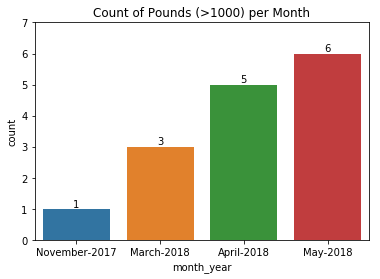

In [17]:
ax = sns.countplot(
    x='month_year',
    data=food[(food["pounds"] >= 1000)],
)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 7);
plt.title("Count of Pounds (>1000) per Month");

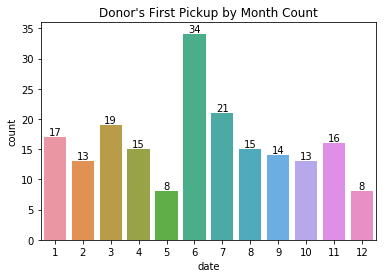

In [18]:
ax = sns.countplot(pd.to_datetime(food.groupby("company")["date"].agg(np.min)).dt.month);
plt.title("Donor's First Pickup by Month Count");
ax.set_ylim(0, 36)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    

$\text{Most first pickup happen in June, the month in which the data was recorded}$

### Counts and Pounds for Size

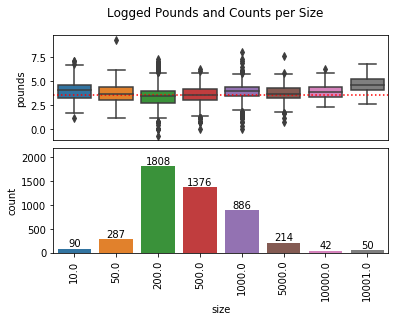

In [19]:
#food["year"] = food["year"].astype("int")
fig, axs = plt.subplots(nrows=2)
sns.boxplot(
    x=food['size'],
    y= np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food,
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 2200)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Counts per Size");

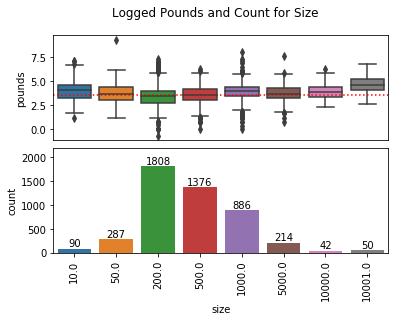

In [20]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food['size'],
    y=np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food,
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 2200)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Count for Size");

\begin{align*}
& -\text{Larger companies (1000+) unsurprisingly has higher amount of food waste} 
\\ &-\text{Company size of 10 has a surprisingly high amount of food waste}
\\ &-\text{Appears to be downward trend and then upward trend with company size and food donation, maybe quadratic trend}
\end{align*}

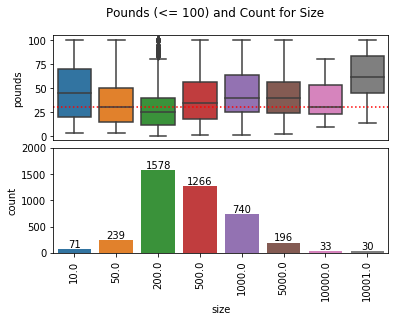

In [21]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[food['pounds'] <= 100]["size"],
    y=food[food["pounds"] <= 100]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food[food["pounds"] <=100],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food["pounds"] <=100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 2000)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<= 100) and Count for Size");

$\text{trend for food donation consistent with previous plot, downward trend and then upward trend}$

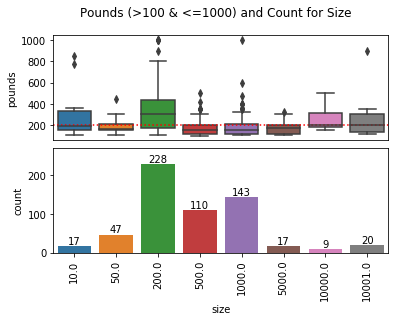

In [22]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["size"],
    y=food[(food["pounds"] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food[(food["pounds"] >100) & (food["pounds"] <=1000)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 270)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <=1000) and Count for Size");

\begin{align*}
& -\text{Large food donations mostly coming from companies with size between 50-200}
\end{align*}

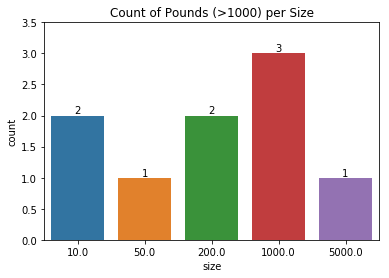

In [23]:
ax = sns.countplot(
    x='size',
    data=food[(food["pounds"] > 1000)],
)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 3.5);
plt.title("Count of Pounds (>1000) per Size");

$\text{Only 10 entries for extreme food donations}$

### Counts and Pounds for Company Type

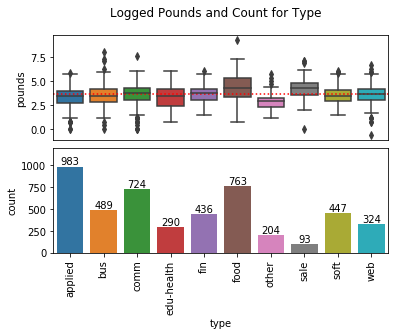

In [24]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food['type'].sort_values(),
    y=np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x=food["type"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 1200)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Count for Type");

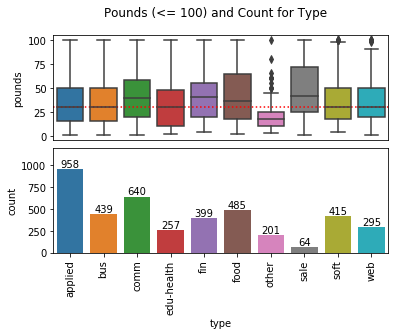

In [25]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[food['pounds'] <= 100]["type"].sort_values(),
    y=food[food["pounds"] <= 100]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x= food[food["pounds"] <=100]["type"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food["pounds"] <=100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 1200)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<= 100) and Count for Type");

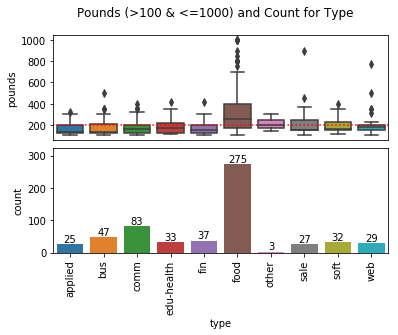

In [26]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["type"].sort_values(),
    y=food[(food["pounds"] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["type"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 325)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <=1000) and Count for Type");

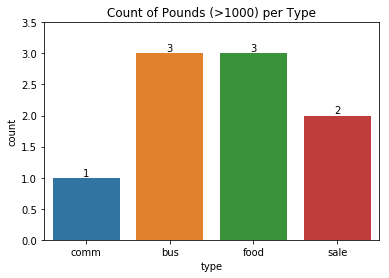

In [27]:
ax = sns.countplot(
    x='type',
    data=food[(food["pounds"] > 1000)],
)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 3.5);
plt.title("Count of Pounds (>1000) per Type");

In [28]:
food[food["type"] == "applied"].groupby("company").count()

,Unnamed: 0,Id,date,pounds,id,number,street,city,state,zip,lat,lon,month,weekday,size,type,week,month_year
company,,,,,,,,,,,,,,,,,,
Aera Technology Inc.,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Bonsai Berkeley,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Boomerang Commerce Mtn.View Ste100,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CYNGN Palo Alto,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Captricity,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Catchpoint,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dataminr,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
Dishcraft Robotics,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Dolby Laboratories / Epicurean Group,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


\begin{align*}
&- \text{A lot of the donations are from companies that are listed under applied}\\
&- \text{Donations from applied are mostly from 2 companies: Dataminr and Zoox}
\end{align*}

In [29]:
food[food["type"] == "food"]["size"].value_counts()

200.0      393
500.0      128
1000.0     102
50.0        72
10001.0     37
10.0        21
5000.0      10
Name: size, dtype: int64

In [30]:
food[food["type"] == "fin"].company.value_counts()

Opendoor                            74
Flexport NYC                        71
Compass Headquarters                59
Metromile                           42
Greylock Partners                   41
Better Mortgage                     32
New Mountain Capital                24
Stripes Group                       21
Norwest Venture Partners            15
BCG Digital Ventures                11
CA VENTURES suite 2100               8
Adams & Company Real Estate, LLC     8
Zillow NYC                           8
Addepar, Inc.                        8
T. Rowe Price                        3
WeWork                               2
Climb Credit NYC Ste. 701            1
Global Logistic Properties           1
Hygge                                1
Cadre (5th Fl)                       1
LaSalle Capital                      1
HouseCanary                          1
First Round Capital                  1
Loan Depot office                    1
UpStart                              1
Name: company, dtype: int

In [31]:
food[food["type"] == "comm"]["company"].value_counts().sort_values(ascending= False)

Twitch                                    437
CircleCI                                  104
Tumblr NYC Office                          62
Braze SF Office                            28
AT&T Foundry                               19
GREE                                       18
Genius                                     17
Fullscreen Media                            7
Slack                                       6
Yahoo NYC                                   5
Drama Fever/WB Digital New York Office      4
OkCupid                                     3
Giphy                                       3
Imgur                                       2
GetGo                                       1
HighFive                                    1
CrowdStar                                   1
SEVENROOMS                                  1
Zinc                                        1
Aviat Networks                              1
Twitter NYC                                 1
SaaStr CSS                        

### Company Longevity

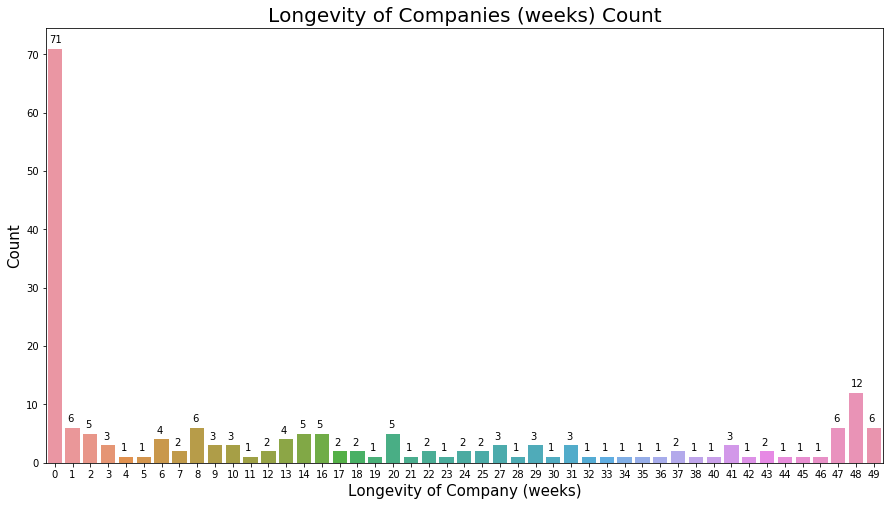

In [32]:
plt.figure(figsize = (15, 8))
longevity_week = food.groupby("company")["date"].agg(lambda x: int((max(x) - min(x))/np.timedelta64(1, "W")))
counts_index = longevity_week.value_counts().index.sort_values()
sns.countplot(longevity_week);
for x, y in enumerate(longevity_week.value_counts().reindex(counts_index)):
    plt.annotate(str(y), xy = (x - 0.3, y + 1))
plt.xlabel("Longevity of Company (weeks)", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.title("Longevity of Companies (weeks) Count", fontsize = 20);

$\text{A lot of single time donations}$

### Company Location (City)

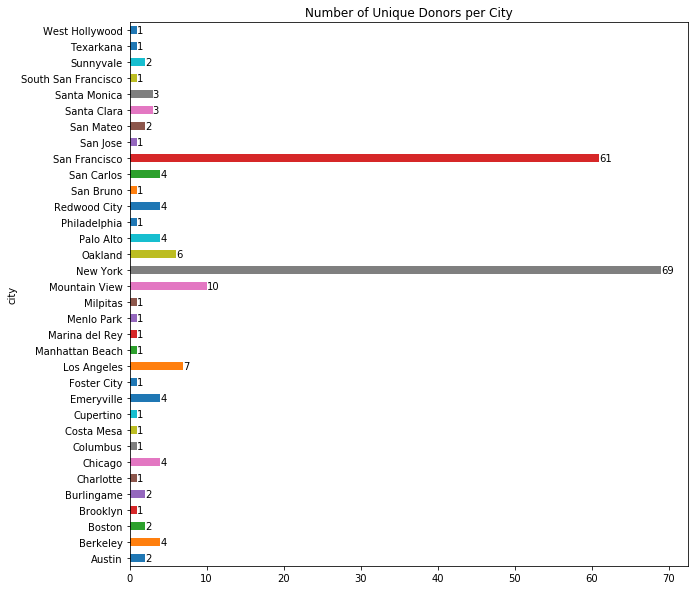

In [33]:
city_companies = food.groupby("city")["company"].unique().agg(len)
city_companies.plot(kind = "barh", figsize = (10,10), 
                   title = "Number of Unique Donors per City")
for y, x in enumerate(city_companies):
    plt.annotate(str(x), xy = (x, y), va = "center")

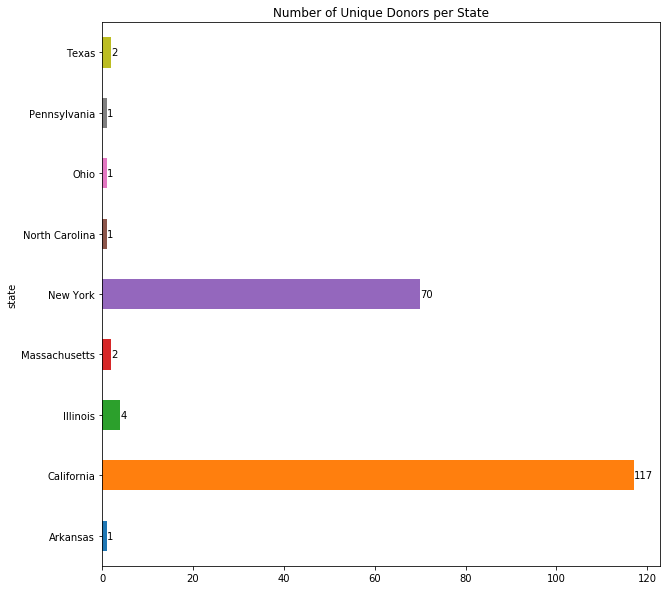

In [34]:
city_state = food.groupby("state")["company"].unique().agg(len)
city_state.plot(kind = "barh", figsize = (10,10), 
                   title = "Number of Unique Donors per State")
for y, x in enumerate(city_state):
    plt.annotate(str(x), xy = (x, y), va = "center")

### Donations per Company

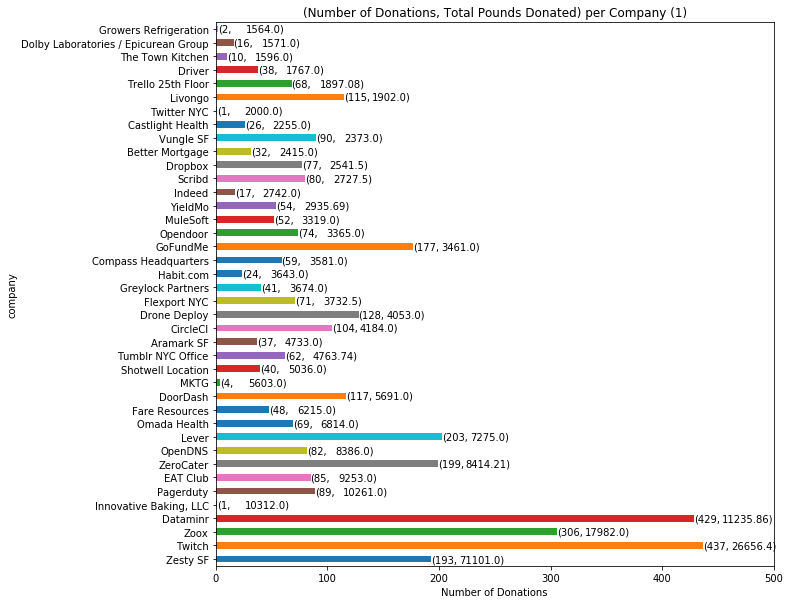

In [35]:
donor_counts = food.groupby("company")["pounds"].count()
donor_pounds = food.groupby("company")["pounds"].agg(np.sum).sort_values(ascending = False)
donor_counts = donor_counts.reindex(index = donor_pounds.index)
ax1 = donor_counts[0:40].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (1)")
for a, b in zip(enumerate(donor_counts[0:40]), enumerate(donor_pounds[0:40])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 25, a[0]), va = "center")
ax1.set_xlim(0,500);
plt.xlabel("Number of Donations");

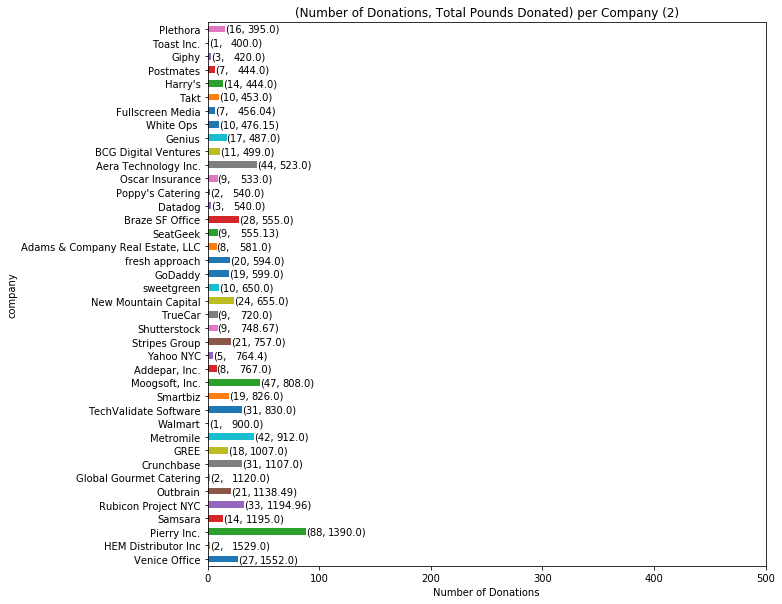

In [36]:
ax2 = donor_counts[40:80].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (2)")
for a, b in zip(enumerate(donor_counts[40:80]), enumerate(donor_pounds[40:80])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 20, a[0]), va = "center")
ax2.set_xlim(0,500);
plt.xlabel("Number of Donations");

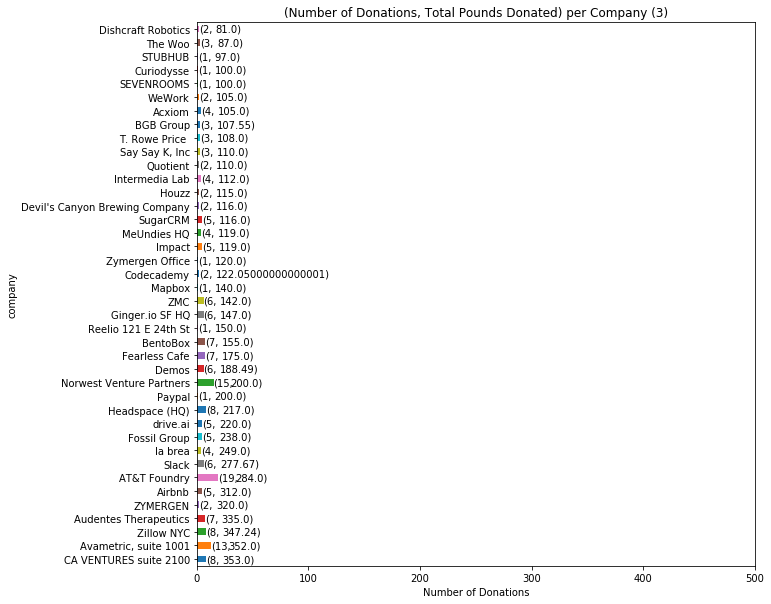

In [37]:
ax3 = donor_counts[80:120].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (3)")
for a, b in zip(enumerate(donor_counts[80:120]), enumerate(donor_pounds[80:120])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(b[1]) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax3.set_xlim(0,500);
plt.xlabel("Number of Donations");

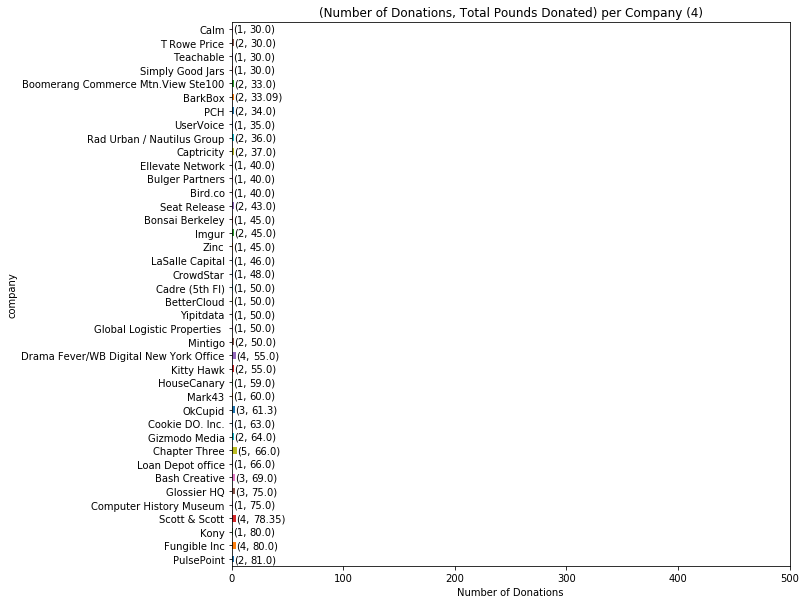

In [38]:
ax4 = donor_counts[120:160].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (4)")
for a, b in zip(enumerate(donor_counts[120:160]), enumerate(donor_pounds[120:160])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax4.set_xlim(0,500);
plt.xlabel("Number of Donations");

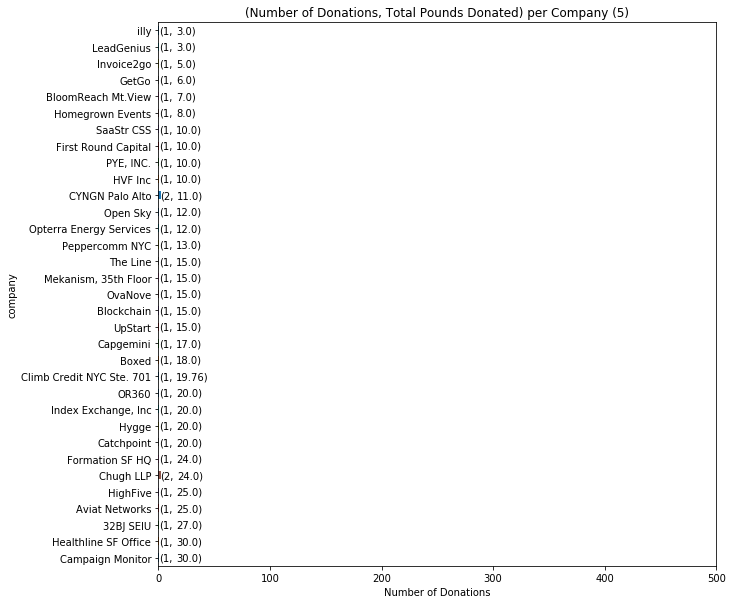

In [39]:
ax5 = donor_counts[160:].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (5)")
for a, b in zip(enumerate(donor_counts[160:]), enumerate(donor_pounds[160:])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax5.set_xlim(0,500);
plt.xlabel("Number of Donations");

### 1 Time Donations

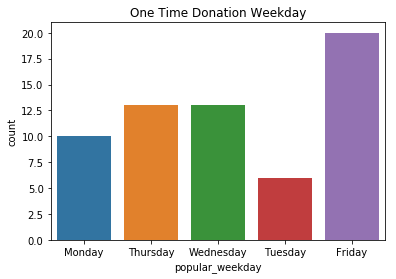

In [40]:
one_donation = company[company["one_donation"] == 1]
sns.countplot(one_donation["popular_weekday"]);
plt.title("One Time Donation Weekday");

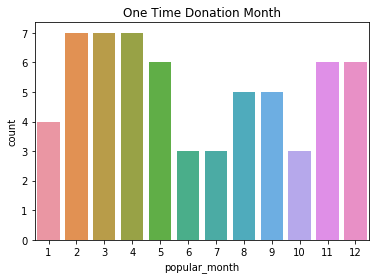

In [41]:
sns.countplot(one_donation["popular_month"]);
plt.title("One Time Donation Month");

\begin{align*}
& -\text{Looking at the companies that only made one donation, there isn't that much}\\
& \text{difference in the distribution of what month the donation was made}\\
& -\text{One time donations does seem to be made on Fridays}
\end{align*}

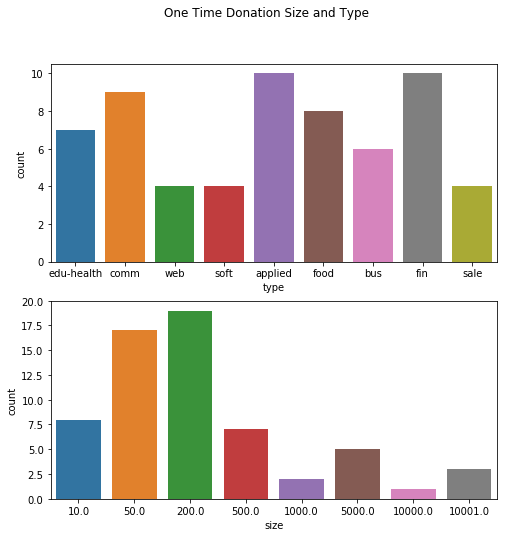

In [42]:
fig, axs = plt.subplots(nrows=2,  figsize = (8,8));

sns.countplot(
    x = "type",
    data = one_donation,
    ax=axs[0]
);

sns.countplot(
    x='size',
    data=one_donation,
    ax=axs[1]
);

# Label the bars with counts
#for patch in axs[1].patches:
#    x = patch.get_bbox().get_points()[:, 0]
#    y = patch.get_bbox().get_points()[1, 1]
#    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
#axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
#axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
#plt.subplots_adjust(hspace=0.07)
plt.suptitle("One Time Donation Size and Type");

\begin{align*}
&- \text{There doesn't appear to be any company type that are more likely to be one-time donators}\\
&- \text{Companies that are between 50-200 employees are the most likely to be one time donators} \\
& \text{however 50-200 employees companies are also the most common companies overall.}
\end{align*}

In [43]:
one_donation["week_donation"].sort_values().head(10)

189     3.0
100     3.0
96      5.0
68      6.0
20      7.0
86      8.0
141    10.0
60     10.0
126    10.0
80     10.0
Name: week_donation, dtype: float64

Min donation for one-time donators is: 3.0
Median donation for one-time donators is: 30.0
Max donation for one-time donators is: 10312.0
0.1 quantile for one-time donators is: 10.0


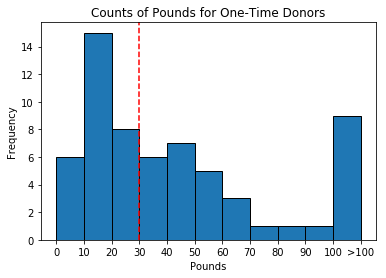

In [44]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
one_donation["week_donation"].clip(upper = 110).plot.hist(bins = bins, edgecolor = "black")
plt.title("Counts of Pounds for One-Time Donors");
plt.axvline(x = one_donation["week_donation"].median(), color = "r", linestyle = "--");
print("Min donation for one-time donators is: " + str(one_donation["week_donation"].min()))
print("Median donation for one-time donators is: " + str(one_donation["week_donation"].median()))
print("Max donation for one-time donators is: " + str(one_donation["week_donation"].max()))
print("0.1 quantile for one-time donators is: " + str(one_donation["week_donation"].quantile(0.10)))
ax = plt.gca()
ax.set_xticks([0, 10, 20,30, 40, 50, 60, 70, 80, 90, 100, 110]);
ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, ">100"]);
plt.xlabel("Pounds");


\begin{align*}
& - \text{Of the companies that only donated once, the minimum number of pounds donated was 3 pounds} \\
& - \text{Most companies donate between 10-20 pounds of food}\\
\end{align*}

### Top Donators 

Min min donation for one-time donators is: 0.5
Median min donation for one-time donators is: 3.0
Max min donation for one-time donators is: 35.0


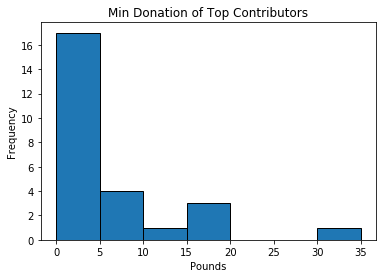

In [45]:
top_contributor_donations = food[food["company"].isin(company[company["top_contributor"] == 1]["company"])]
top_contributor_min_donation = top_contributor_donations.groupby("company")["pounds"].min()
top_contributor_min_donation.plot.hist(bins = np.arange(0, 40, 5), edgecolor = "black")
plt.title("Min Donation of Top Contributors");
print("Min min donation for one-time donators is: " + str(top_contributor_min_donation.min()))
print("Median min donation for one-time donators is: " + str(top_contributor_min_donation.median()))
print("Max min donation for one-time donators is: " + str(top_contributor_min_donation.max()))
plt.xlabel("Pounds");

\begin{align*}
&- \text{Minimum donations from companies that repeatedly donate is around 0-5 pounds}\\
& \text{versus 10-20 pounds from one time donators}\\
\end{align*}

Minimum mean donation for top donors is: 15.7954545455
Median mean donation for top donors is: 47.05699930699931
Max mean donation for top donors is: 368.398963731


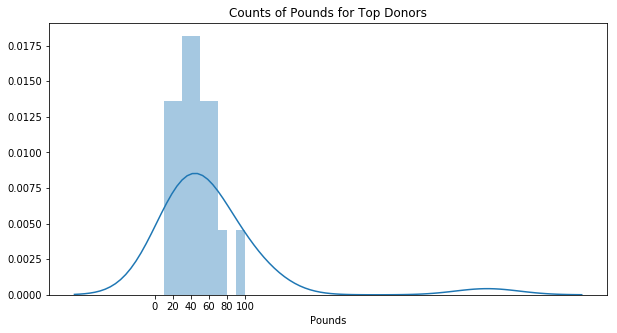

In [46]:
fig, axs = plt.subplots(nrows=1,  figsize = (10,5));
bins = [0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100]
top_contributor_mean_pounds = top_contributor_donations.groupby("company")["pounds"].mean()
#top_contributor_mean_pounds.plot.hist(bins = bins, edgecolor = "black")
sns.distplot(top_contributor_mean_pounds, bins = bins)
plt.title("Counts of Pounds for Top Donors");
print("Minimum mean donation for top donors is: " + str(top_contributor_mean_pounds.min()))
print("Median mean donation for top donors is: " + str(top_contributor_mean_pounds.median()))
print("Max mean donation for top donors is: " + str(top_contributor_mean_pounds.max()))
ax = plt.gca()
ax.set_xticks([0, 20, 40, 60, 80, 100]);
#ax.set_xticklabels([0, 20, 40, 60, 80, ">100"]);
plt.xlabel("Pounds");


\begin{align*}
\text{Average donations from top donors tend to be around 40 pounds} 
\end{align*}

In [47]:
company.head()

,company,max_pound_weekday,num_donation,num_weeks,one_donation,popular_month,popular_month_frac,popular_weekday,popular_weekday_frac,size,start_month,state,type,week_donation,top_contributor
0,32BJ SEIU,Monday,1,1,1,9,1.000000,Monday,1.000000,500.0,9,New York,edu-health,27.000000,0
1,AT&T Foundry,Monday,19,11,0,4,0.473684,Wednesday,0.526316,50.0,3,California,comm,25.818182,0
2,Acxiom,Thursday,4,15,0,4,0.500000,Thursday,0.750000,5000.0,2,New York,bus,7.000000,0
3,"Adams & Company Real Estate, LLC",Tuesday,8,18,0,1,0.375000,Wednesday,0.250000,200.0,1,New York,fin,32.277778,0
4,"Addepar, Inc.",Friday,8,15,0,5,0.375000,Friday,1.000000,500.0,2,New York,fin,51.133333,0


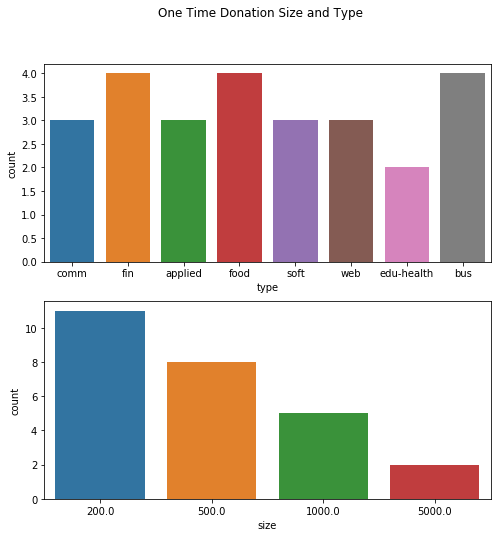

In [48]:
fig, axs = plt.subplots(nrows=2,  figsize = (8,8));
top_contributor_comp = company[company["top_contributor"] == 1]

sns.countplot(
    x = "type",
    data = top_contributor_comp,
    ax=axs[0]
);

sns.countplot(
    x='size',
    data=top_contributor_comp,
    ax=axs[1]
);

# Label the bars with counts
#for patch in axs[1].patches:
#    x = patch.get_bbox().get_points()[:, 0]
#    y = patch.get_bbox().get_points()[1, 1]
#    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
#axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
#axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
#plt.subplots_adjust(hspace=0.07)
plt.suptitle("One Time Donation Size and Type");

In [49]:
from pandas.api.types import CategoricalDtype

def ohe_size(data): 
    cats = data["size"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['size'] = data['size'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='size',
                    columns=['size'], 
                    drop_first=True)
    return data

In [51]:
#agg_date = agg_date[(agg_date["week"] == np.median(agg_date["week"])//1) | (agg_date["week"] == np.min(agg_date["week"])//1) | (agg_date["week"] == np.max(agg_date["week"])//1)]
#agg_date = agg_date.groupby("week")["pounds"].agg(np.sum)agg_date
#np.mean(agg_date.groupby("week")["pounds"].agg(np.sum))

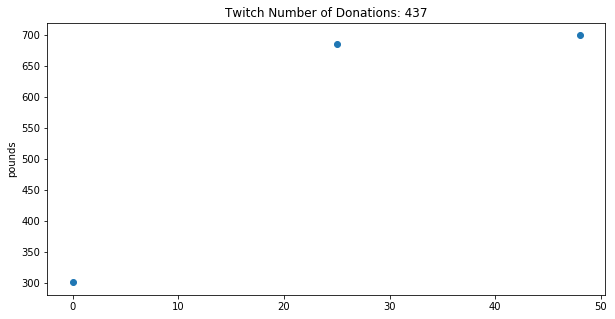

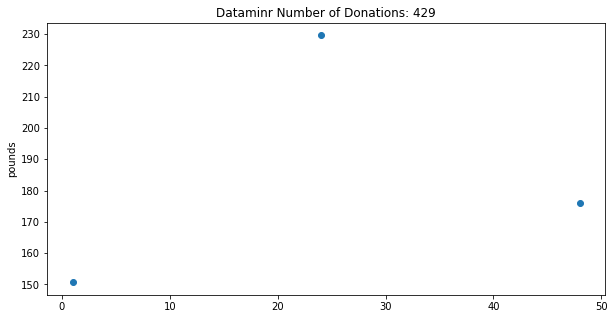

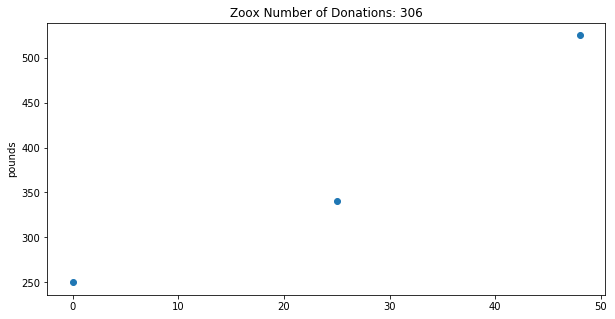

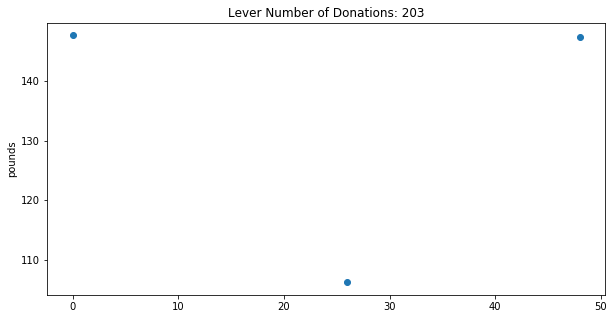

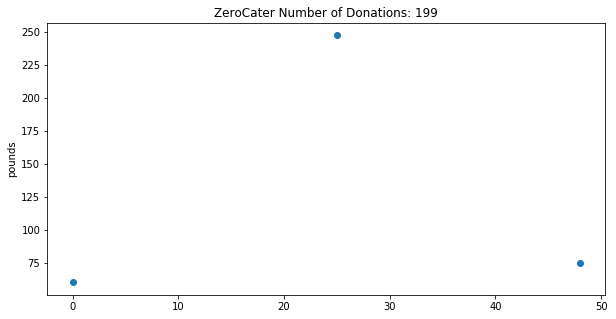

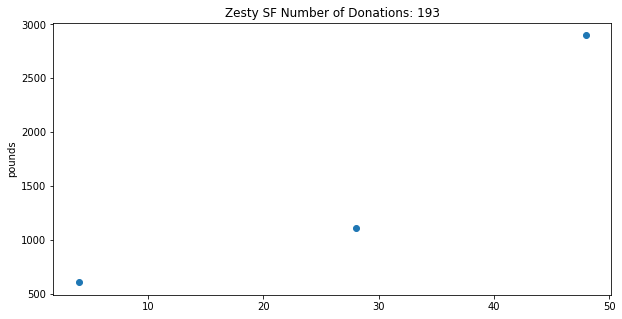

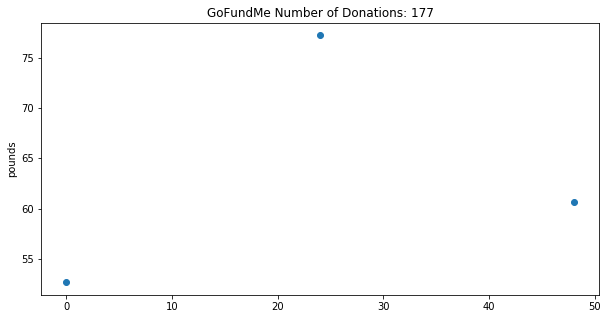

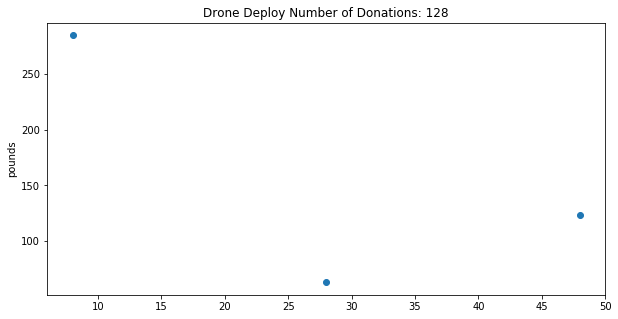

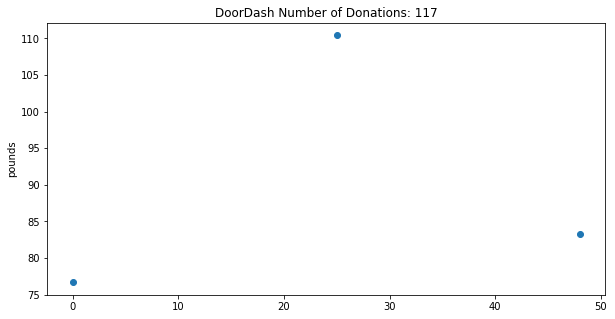

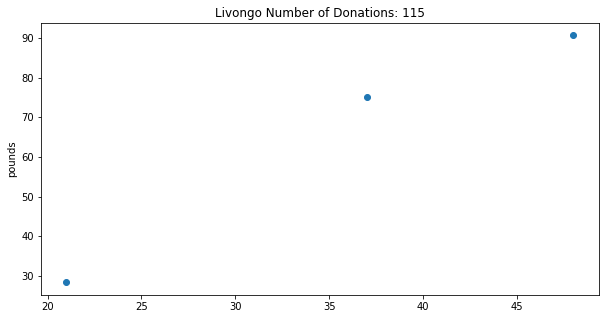

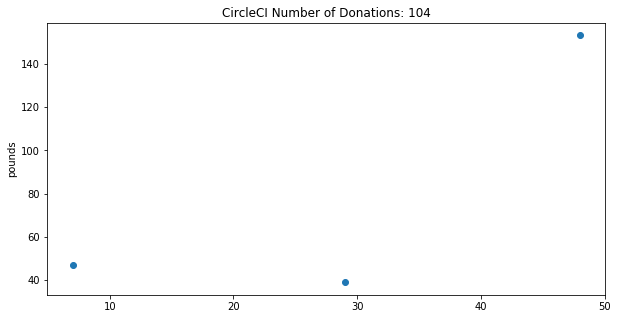

In [54]:
top_11 = food.groupby("company")["pounds"].count().sort_values(ascending = False)[:11].index
top_11_values = food.groupby("company")["pounds"].count().sort_values(ascending = False)[:11]
for i in range(len(top_11)):
    fig, axs = plt.subplots(nrows=1,  figsize = (10,5));
    agg_date = pd.DataFrame(food[food["company"] == top_11[i]].groupby("date")["pounds"].agg(np.sum))
    agg_date["week"] = agg_date.index.week
    agg_date["week"] = agg_date["week"].apply(lambda x: x - 25 if x >= 25
                                         else x + 26)
    min_week = np.min(agg_date["week"])
    med_week = np.median(agg_date["week"])//1
    max_week = np.max(agg_date["week"])
    min_week_range = np.arange(min_week - 2, min_week + 3)
    agg_date_min = agg_date[agg_date["week"].isin(min_week_range)]
    agg_date_min = np.mean(agg_date_min.groupby("week")["pounds"].agg(np.sum))
    med_week_range = np.arange(med_week - 2, med_week + 3)
    agg_date_med = agg_date[agg_date["week"].isin(med_week_range)]
    agg_date_med = np.mean(agg_date_med.groupby("week")["pounds"].agg(np.sum))
    max_week_range = np.arange(max_week - 2, max_week + 3)
    agg_date_max = agg_date[agg_date["week"].isin(max_week_range)]
    agg_date_max = np.mean(agg_date_max.groupby("week")["pounds"].agg(np.sum))
    #plt.plot(np.array([min_week, med_week, max_week]), 
    #                 np.array([agg_date_min, agg_date_med, agg_date_max]), "-o")
    fig = plt.scatter(np.array([min_week, med_week, max_week]), 
                     np.array([agg_date_min, agg_date_med, agg_date_max]))
    #fig = agg_date.groupby("week")["pounds"].agg(np.mean).plot()
    plt.ylabel("pounds");
    plt.title(top_11[i] + " Number of Donations: " + str(top_11_values[i]))


In [55]:
top_11 = ['Dataminr', 'Lever', 'ZeroCater',
       'GoFundMe', 'Drone Deploy', 'DoorDash', 'Livongo', 'CircleCI']
top_11_values = food[food["company"].isin(top_11)].groupby("company")["pounds"].count().sort_values(ascending = False)
top_11_values

company
Dataminr        429
Lever           203
ZeroCater       199
GoFundMe        177
Drone Deploy    128
DoorDash        117
Livongo         115
CircleCI        104
Name: pounds, dtype: int64

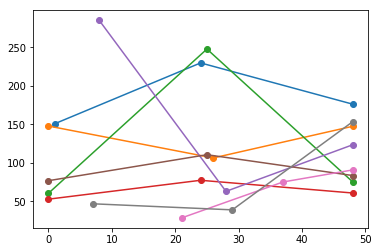

In [56]:
top_11 = ['Dataminr', 'Lever', 'ZeroCater',
       'GoFundMe', 'Drone Deploy', 'DoorDash', 'Livongo', 'CircleCI']
top_11_values = food[food["company"].isin(top_11)].groupby("company")["pounds"].count().sort_values(ascending = False)

for i in range(len(top_11)):
    #fig, axs = plt.subplots(nrows=1,  figsize = (10,5));
    agg_date = pd.DataFrame(food[food["company"] == top_11[i]].groupby("date")["pounds"].agg(np.sum))
    agg_date["week"] = agg_date.index.week
    agg_date["week"] = agg_date["week"].apply(lambda x: x - 25 if x >= 25
                                         else x + 26)
    min_week = np.min(agg_date["week"])
    med_week = np.median(agg_date["week"])//1
    max_week = np.max(agg_date["week"])
    min_week_range = np.arange(min_week - 2, min_week + 3)
    agg_date_min = agg_date[agg_date["week"].isin(min_week_range)]
    agg_date_min = np.mean(agg_date_min.groupby("week")["pounds"].agg(np.sum))
    med_week_range = np.arange(med_week - 2, med_week + 3)
    agg_date_med = agg_date[agg_date["week"].isin(med_week_range)]
    agg_date_med = np.mean(agg_date_med.groupby("week")["pounds"].agg(np.sum))
    max_week_range = np.arange(max_week - 2, max_week + 3)
    agg_date_max = agg_date[agg_date["week"].isin(max_week_range)]
    agg_date_max = np.mean(agg_date_max.groupby("week")["pounds"].agg(np.sum))
    plt.plot(np.array([min_week, med_week, max_week]), 
                     np.array([agg_date_min, agg_date_med, agg_date_max]), "-o")
    #fig = plt.scatter(np.array([min_week, med_week, max_week]), 
    #                 np.array([agg_date_min, agg_date_med, agg_date_max]))
    #fig = agg_date.groupby("week")["pounds"].agg(np.mean).plot()
    #plt.ylabel("pounds");
    #plt.title(top_11[i] + " Number of Donations: " + str(top_11_values[i]))


In [57]:
agg_date[(agg_date["week"] == np.median(agg_date["week"])//1) | (agg_date["week"] == np.min(agg_date["week"])//1) | (agg_date["week"] == np.max(agg_date["week"])//1)].groupby("week")["pounds"].agg(np.sum).index

Int64Index([7, 29, 48], dtype='int64', name='week')

In [58]:
one_donation = food.groupby("company")["company"].count()
one_donors = one_donation[one_donation == 1].index

In [59]:
food_multi_donors = food[~food["company"].isin(one_donors)]
food_multi_donors["donation_month"] = food_multi_donors.groupby(["company"])["date"].apply(lambda x: ((x - min(x))/np.timedelta64(1, "M")).astype("int"))

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
company_by_month = food_multi_donors.groupby(["company", "donation_month"])["pounds"].agg(np.sum).reset_index()

In [75]:
donation_avg = company_by_month.groupby("donation_month")["pounds"].agg(np.mean)
donation_std = company_by_month.groupby("donation_month")["pounds"].agg(np.std)
donation_count = company_by_month.groupby("donation_month")["pounds"].count()

In [76]:
for a, b, c in zip(enumerate(donation_avg), enumerate(donation_count), enumerate(donation_std)):
    print(a, b, c)
    
    # plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
   # plt.annotate(str(round(b[1], 2)) + ")", xy = (a[1], a[0] + 25))

(0, 321.4780769230769) (0, 130) (0, 646.2236737259556)
(1, 328.9139534883721) (1, 86) (1, 722.5186305308578)
(2, 380.4874358974359) (2, 78) (2, 582.7179993329421)
(3, 346.75577464788734) (3, 71) (3, 563.3065974066798)
(4, 454.09100000000007) (4, 60) (4, 809.498151298022)
(5, 453.5816326530612) (5, 49) (5, 726.5667936929673)
(6, 384.46666666666664) (6, 45) (6, 617.1340873895898)
(7, 687.1463414634146) (7, 41) (7, 1253.673353808232)
(8, 785.4027777777778) (8, 36) (8, 1599.1531456164291)
(9, 1022.15625) (9, 32) (9, 2987.5314560025704)
(10, 786.0060714285713) (10, 28) (10, 1243.275058030616)
(11, 230.42105263157896) (11, 19) (11, 300.50149117571846)


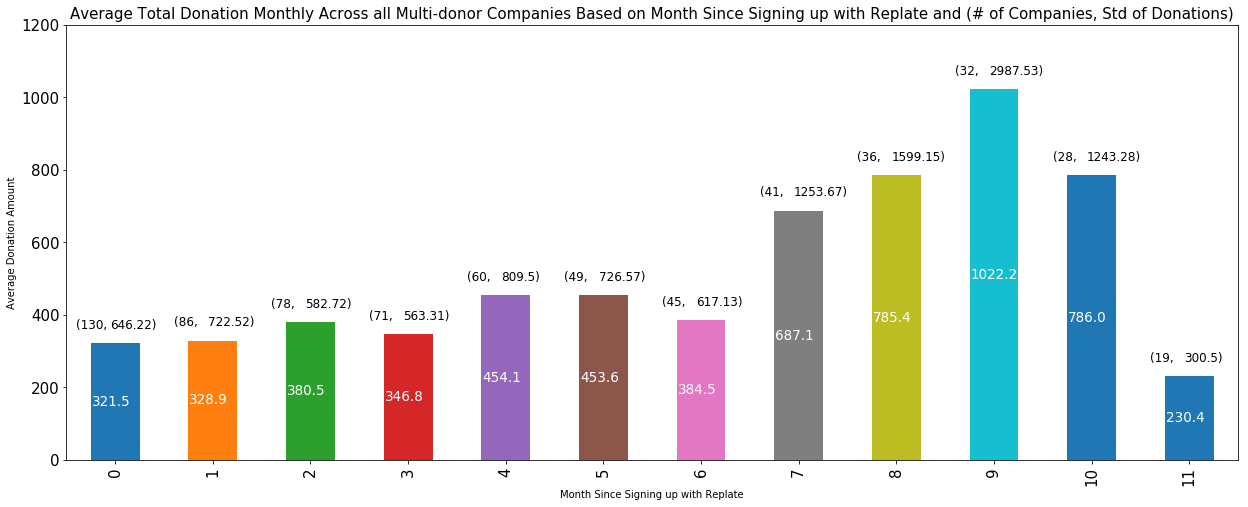

In [77]:
ax = donation_avg.plot(kind = "bar", figsize = (21, 8), fontsize = 15);
ax.set_ylim(0,1200);
for a, b, c in zip(enumerate(donation_avg), enumerate(donation_count), enumerate(donation_std)):
    ax.annotate(str(round(a[1], 1)), xy = (a[0] - 0.24, a[1]/2), va = "center", fontsize = 13.5, color = "white");
    ax.annotate("(" + str(b[1]) + ",", xy = (a[0] - 0.4, a[1] + 50), va = "center", fontsize = 12);
    ax.annotate(str(round(c[1], 2)) + ")", xy = (a[0] - 0.05, a[1] + 50), va = "center", fontsize = 12);
ax.set_title("Average Total Donation Monthly Across all Multi-donor Companies Based on Month Since Signing up with Replate and (# of Companies, Std of Donations)", 
            fontsize = 15);
ax.set_ylabel("Average Donation Amount");
ax.set_xlabel("Month Since Signing up with Replate");
#for a in enumerate()
#fig, axs = plt.subplots(nrows=1,  figsize = (10,5));
#axs = plt.bar(x = donation_avg.index, height = donation_avg);
##for patch in axs.patches:
 #   x = patch.get_bbox().get_points()[:, 0]
 #   y = patch.get_bbox().get_points()[1, 1]
  #  axs.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

In [81]:
month_0 = company_by_month[company_by_month["donation_month"] == 0]["pounds"]
for i in range(1, 12):
    month = company_by_month[company_by_month["donation_month"] == i]["pounds"]
    print("month " + str(i) + " p-value: ", ttest_ind(month_0, month, equal_var = False)[1])

month 1 p-value:  0.938573015533
month 2 p-value:  0.498400704861
month 3 p-value:  0.77340147791
month 4 p-value:  0.267462983245
month 5 p-value:  0.267390816422
month 6 p-value:  0.561581494529
month 7 p-value:  0.0792647896226
month 8 p-value:  0.0967708938063
month 9 p-value:  0.196563460751
month 10 p-value:  0.0640878071411
month 11 p-value:  0.312761272136


In [85]:
regular_donors = company_by_month[company_by_month["donation_month"] >= 9].company
regular_donor_company = company_by_month[company_by_month["company"].isin(regular_donors)]
donation_avg = regular_donor_company.groupby("donation_month")["pounds"].agg(np.mean)
donation_std = regular_donor_company.groupby("donation_month")["pounds"].agg(np.std)
donation_count = regular_donor_company.groupby("donation_month")["pounds"].count()

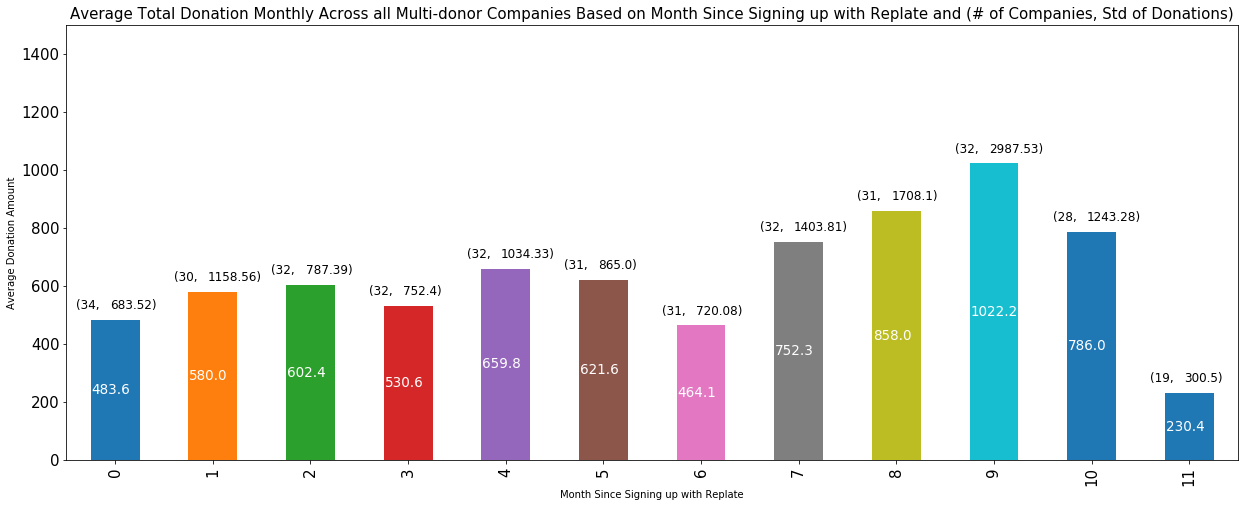

In [86]:
ax = donation_avg.plot(kind = "bar", figsize = (21, 8), fontsize = 15);
ax.set_ylim(0,1500);
for a, b, c in zip(enumerate(donation_avg), enumerate(donation_count), enumerate(donation_std)):
    ax.annotate(str(round(a[1], 1)), xy = (a[0] - 0.24, a[1]/2), va = "center", fontsize = 13.5, color = "white");
    ax.annotate("(" + str(b[1]) + ",", xy = (a[0] - 0.4, a[1] + 50), va = "center", fontsize = 12);
    ax.annotate(str(round(c[1], 2)) + ")", xy = (a[0] - 0.05, a[1] + 50), va = "center", fontsize = 12);
ax.set_title("Average Total Donation Monthly Across all Multi-donor Companies Based on Month Since Signing up with Replate and (# of Companies, Std of Donations)", 
            fontsize = 15);
ax.set_ylabel("Average Donation Amount");
ax.set_xlabel("Month Since Signing up with Replate");

In [88]:
month_0 = regular_donor_company[regular_donor_company["donation_month"] == 0]["pounds"]
for i in range(1, 12):
    month = regular_donor_company[regular_donor_company["donation_month"] == i]["pounds"]
    print("month " + str(i) + " p-value: ", ttest_ind(month_0, month, equal_var = False)[1])

month 1 p-value:  0.69201755252
month 2 p-value:  0.516317750163
month 3 p-value:  0.792074999523
month 4 p-value:  0.421060986784
month 5 p-value:  0.481207590426
month 6 p-value:  0.911356379195
month 7 p-value:  0.332874695847
month 8 p-value:  0.261287315254
month 9 p-value:  0.326541009486
month 10 p-value:  0.256334959364
month 11 p-value:  0.068599720695


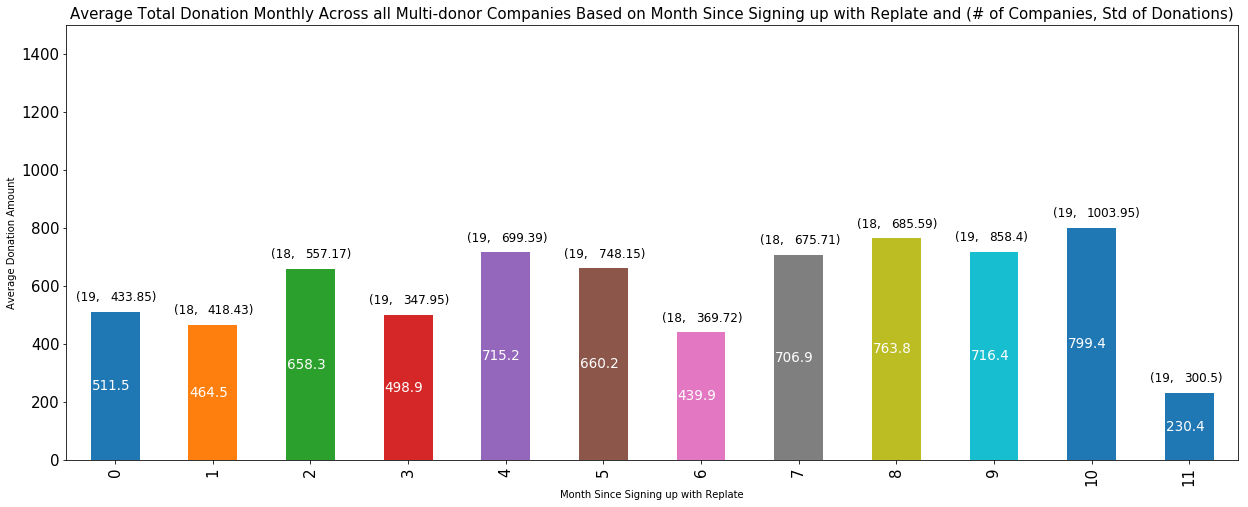

In [69]:
regular_donors = company_by_month[company_by_month["donation_month"] >= 11].company
regular_donor_company = company_by_month[company_by_month["company"].isin(regular_donors)]
donation_avg = regular_donor_company.groupby("donation_month")["pounds"].agg(np.mean)
donation_std = regular_donor_company.groupby("donation_month")["pounds"].agg(np.std)
donation_count = regular_donor_company.groupby("donation_month")["pounds"].count()
ax = donation_avg.plot(kind = "bar", figsize = (21, 8), fontsize = 15);
ax.set_ylim(0,1500);
for a, b, c in zip(enumerate(donation_avg), enumerate(donation_count), enumerate(donation_std)):
    ax.annotate(str(round(a[1], 1)), xy = (a[0] - 0.24, a[1]/2), va = "center", fontsize = 13.5, color = "white");
    ax.annotate("(" + str(b[1]) + ",", xy = (a[0] - 0.4, a[1] + 50), va = "center", fontsize = 12);
    ax.annotate(str(round(c[1], 2)) + ")", xy = (a[0] - 0.05, a[1] + 50), va = "center", fontsize = 12);
ax.set_title("Average Total Donation Monthly Across all Multi-donor Companies Based on Month Since Signing up with Replate and (# of Companies, Std of Donations)", 
            fontsize = 15);
ax.set_ylabel("Average Donation Amount");
ax.set_xlabel("Month Since Signing up with Replate");


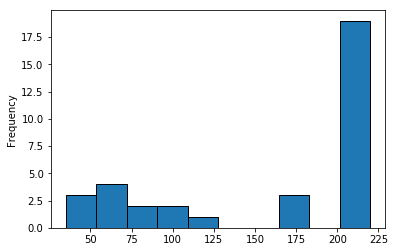

In [113]:
regular_donor_company[regular_donor_company["donation_month"] == 0]["pounds"].clip(upper = 220).plot(kind = "hist", edgecolor = "black")#.plot.hist(bins = bins, edgecolor = "black");

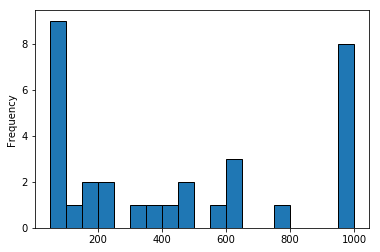

In [128]:
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 950, 1000]
regular_donor_company[regular_donor_company["donation_month"] == 7]["pounds"].clip(lower = 50, upper = 1000).plot(kind = "hist", bins = bins, edgecolor = "black");

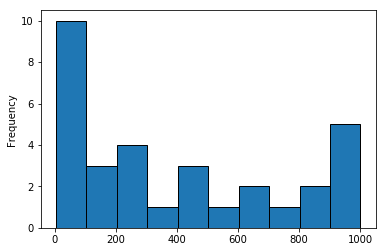

In [143]:
regular_donor_company[regular_donor_company["donation_month"] == 9]["pounds"].clip(upper = 1000).plot(kind = "hist", edgecolor = "black")

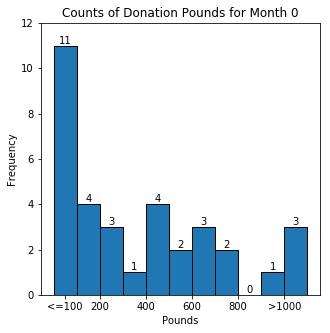

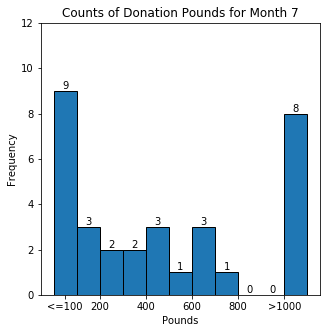

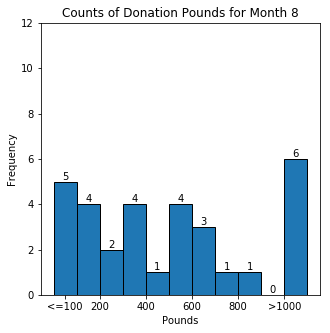

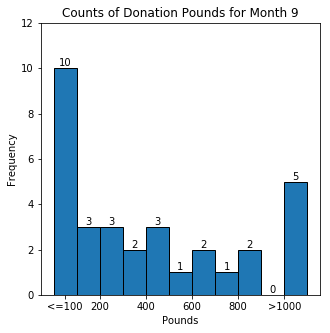

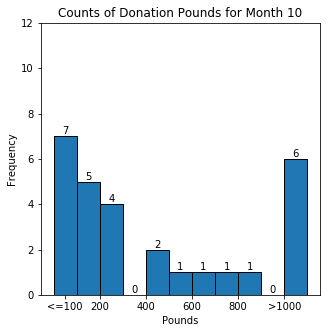

In [167]:
bins = [0, 100, 200, 300, 400, 500, 
600, 700, 800, 900, 1000, 1100]

plot_months = [0, 7, 8, 9, 10]
for i in plot_months:
    fig, axs = plt.subplots(nrows=1,  figsize = (5,5));
    regular_donor_company[regular_donor_company["donation_month"] == i]["pounds"].clip(lower = 99, upper = 1001).plot(kind = "hist", bins = bins, edgecolor = "black");
    plt.title("Counts of Donation Pounds for Month " + str(i));
    ax = plt.gca()
    ax.set_xticks([50, 200, 400, 600, 800, 1000]);
    ax.set_xticklabels(["<=100", 200, 400, 600, 800, ">1000"]);
    plt.xlabel("Pounds");
    for patch in ax.patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    ax.set_ylim(0,12);

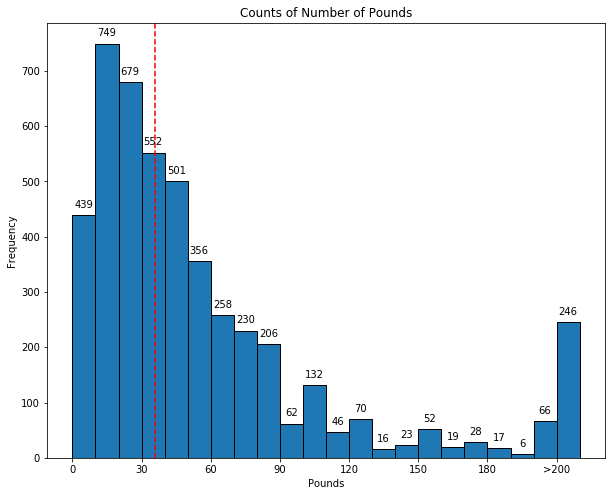

In [148]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
       110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]
food["pounds"].clip(upper = 220).plot.hist(bins = bins, edgecolor = "black", figsize = (10, 8));
plt.title("Counts of Number of Pounds");
ax = plt.gca()
ax.set_xticks([0, 30, 60, 90, 120, 150, 180, 210]);
ax.set_xticklabels([0, 30, 60, 90, 120, 150, 180, ">200"]);
plt.xlabel("Pounds");
plt.axvline(x = food["pounds"].median(), color = "r", linestyle = "--");
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y + 10), ha='center', va='bottom', fontsize = 10)

In [103]:
regular_donor_company[regular_donor_company["donation_month"] == 7]["pounds"].clip(upper = 220)

22      42.0
37      32.0
72     100.0
107    220.0
122    212.0
135    220.0
161    220.0
181    220.0
191    220.0
202    220.0
214    220.0
226    220.0
270    220.0
282    220.0
325    220.0
348     82.0
361     23.0
390    220.0
402    220.0
421     50.0
434    220.0
446     83.0
483     95.0
505    155.0
510     38.0
559     36.0
578    220.0
592    177.0
613    220.0
627    220.0
639    220.0
657    220.0
Name: pounds, dtype: float64

In [315]:
month_0 = regular_donor_company[regular_donor_company["donation_month"] == 0]["pounds"]
for i in range(1, 12):
    month = regular_donor_company[regular_donor_company["donation_month"] == i]["pounds"]
    print("month " + str(i) + " p-value: ", ttest_ind(month_0, month, equal_var = False)[1])

month 1 p-value:  0.614517214257
month 2 p-value:  0.469173257029
month 3 p-value:  0.922690732194
month 4 p-value:  0.27441988179
month 5 p-value:  0.443234675298
month 6 p-value:  0.476012405092
month 7 p-value:  0.374870946829
month 8 p-value:  0.243913118083
month 9 p-value:  0.357196928089
month 10 p-value:  0.254471071381
month 11 p-value:  0.0244854461733


In [185]:
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "Underdeveloped"


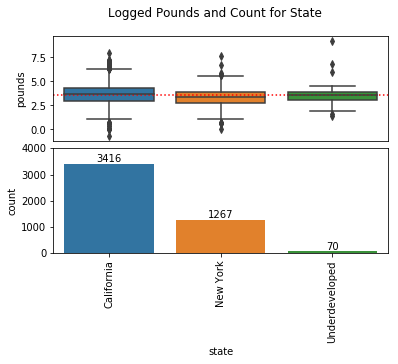

In [192]:
fig, axs = plt.subplots(nrows=2)
sns.boxplot(
    x=food["state"].sort_values(),
    y=np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x= food["state"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 4000)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Count for State");

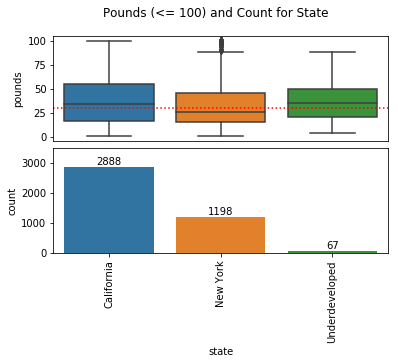

In [196]:
fig, axs = plt.subplots(nrows=2)
sns.boxplot(
    x=food[(food['pounds'] <= 100)]["state"].sort_values(),
    y=food[(food["pounds"] <= 100)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x= food[food["pounds"] <= 100]["state"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food["pounds"] <= 100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 3500)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<= 100) and Count for State");

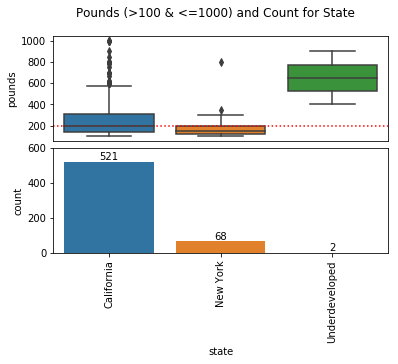

In [200]:
fig, axs = plt.subplots(nrows=2)
sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["state"].sort_values(),
    y=food[(food["pounds"] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["state"].sort_values(),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].set_ylim(0, 600)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <=1000) and Count for State");

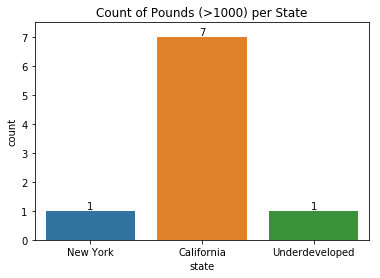

In [204]:
ax = sns.countplot(
    x='state',
    data=food[(food["pounds"] > 1000)],
)
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 7.5);
plt.title("Count of Pounds (>1000) per State");

In [212]:
food[food["state"] == "Underdeveloped"]

,Unnamed: 0,Id,date,pounds,id,number,street,city,company,state,zip,lat,lon,month,weekday,size,type,week,month_year
1833,2628,2736,2017-11-17,15.0,550,444,North Michigan Avenue,Chicago,Livongo,Underdeveloped,60611,41.890682,-87.624829,11,Friday,200.0,edu-health,21,November-2017
1868,2674,2782,2017-11-20,36.0,550,444,North Michigan Avenue,Chicago,Livongo,Underdeveloped,60611,41.890682,-87.624829,11,Monday,200.0,edu-health,22,November-2017
1921,2767,2875,2017-11-27,34.0,550,444,North Michigan Avenue,Chicago,Livongo,Underdeveloped,60611,41.890682,-87.624829,11,Monday,200.0,edu-health,23,November-2017
2012,2867,2975,2017-12-01,70.0,600,127,East Riverside Drive,Austin,ZeroCater,Underdeveloped,78704,30.255850,-97.745926,12,Friday,200.0,food,23,December-2017
2029,2885,2994,2017-12-04,20.0,550,444,North Michigan Avenue,Chicago,Livongo,Underdeveloped,60611,41.890682,-87.624829,12,Monday,200.0,edu-health,24,December-2017
2110,2981,3091,2017-12-07,68.0,600,127,East Riverside Drive,Austin,ZeroCater,Underdeveloped,78704,30.255850,-97.745926,12,Thursday,200.0,food,24,December-2017
2118,2991,3101,2017-12-08,50.0,614,2,North Riverside Plaza,Chicago,Global Logistic Properties,Underdeveloped,60606,41.882523,-87.639136,12,Friday,5000.0,fin,24,December-2017
2121,2995,3105,2017-12-08,46.0,600,127,East Riverside Drive,Austin,ZeroCater,Underdeveloped,78704,30.255850,-97.745926,12,Friday,200.0,food,24,December-2017
2136,3016,3126,2017-12-11,34.0,550,444,North Michigan Avenue,Chicago,Livongo,Underdeveloped,60611,41.890682,-87.624829,12,Monday,200.0,edu-health,25,December-2017
2165,3056,3166,2017-12-13,46.0,643,76,East Monroe Street,Chicago,LaSalle Capital,Underdeveloped,60603,41.880990,-87.625043,12,Wednesday,50.0,fin,25,December-2017


In [208]:
ttest_ind(food[food["state"] == "California"]["pounds"], food[food["state"] == "Underdeveloped"]["pounds"], equal_var = False)

Ttest_indResult(statistic=-0.85730157756120939, pvalue=0.39424485620340777)

In [209]:
ttest_ind(food[food["state"] == "New York"]["pounds"], food[food["state"] == "Underdeveloped"]["pounds"], equal_var = False)

Ttest_indResult(statistic=-1.0827409809668522, pvalue=0.28269132747318337)

In [207]:
ttest_ind(food[food["state"] == "New York"]["pounds"], food[food["state"] == "California"]["pounds"], equal_var = False)

Ttest_indResult(statistic=-11.259919027686463, pvalue=5.6385562795894423e-29)

In [333]:
ttest_ind(food[food["state"] != "Underdeveloped"]["pounds"], food[food["state"] == "Underdeveloped"]["pounds"], equal_var = False)

Ttest_indResult(statistic=3.7233559371797629, pvalue=0.00038668610270285519)

In [345]:
company = food.groupby(["state", "company"])["pounds"].agg(np.mean).reset_index()
ttest_ind(company[company["state"] != "Underdeveloped"]["pounds"], company[company["state"] == "Underdeveloped"]["pounds"], equal_var = False)

Ttest_indResult(statistic=-0.33814996767718303, pvalue=0.74774464450671507)

In [211]:
food["type"].unique()

array(['food', 'fin', 'comm', 'soft', 'bus', 'edu-health', 'applied',
       'web', 'sale'], dtype=object)

In [347]:
company[company["state"] == "Underdeveloped"]

,state,company,pounds
185,Underdeveloped,CA VENTURES suite 2100,44.125000
186,Underdeveloped,Hygge,20.000000
187,Underdeveloped,Livongo,27.692308
188,Underdeveloped,Simply Good Jars,30.000000
189,Underdeveloped,Toast Inc.,400.000000
190,Underdeveloped,ZeroCater,54.500000


In [350]:
food[food["state"] == "Underdeveloped"]

,Unnamed: 0,Unnamed: 0.1,Id,date,pounds,id,number,street,city,company,...,lat,lon,pickup,planned,month,day,year,weekday,size,type
1820,1833,2628,2736,2017-11-17,15.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,11,17,2017,Friday,200.0,edu-health
1855,1868,2674,2782,2017-11-20,36.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,11,20,2017,Monday,200.0,edu-health
1908,1921,2767,2875,2017-11-27,34.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,11,27,2017,Monday,200.0,edu-health
1998,2012,2867,2975,2017-12-01,70.0,600,127,East Riverside Drive,Austin,ZeroCater,...,30.255850,-97.745926,20,False,12,1,2017,Friday,200.0,food
2015,2029,2885,2994,2017-12-04,20.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,12,4,2017,Monday,200.0,edu-health
2095,2110,2981,3091,2017-12-07,68.0,600,127,East Riverside Drive,Austin,ZeroCater,...,30.255850,-97.745926,20,False,12,7,2017,Thursday,200.0,food
2105,2121,2995,3105,2017-12-08,46.0,600,127,East Riverside Drive,Austin,ZeroCater,...,30.255850,-97.745926,20,False,12,8,2017,Friday,200.0,food
2120,2136,3016,3126,2017-12-11,34.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,12,11,2017,Monday,200.0,edu-health
2162,2181,3076,3186,2017-12-13,36.0,550,444,North Michigan Avenue,Chicago,Livongo,...,41.890682,-87.624829,30,False,12,13,2017,Wednesday,200.0,edu-health
2196,2216,3119,3235,2017-12-15,53.0,592,127,East Riverside Drive,Austin,ZeroCater,...,30.255850,-97.745926,25,False,12,15,2017,Friday,200.0,food


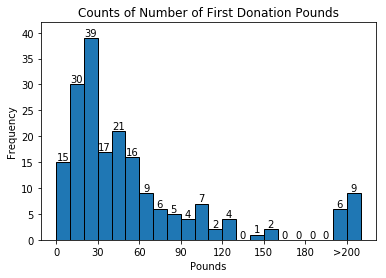

In [104]:
ax = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"].clip(upper = 220).plot.hist(bins = bins, edgecolor = "black");
plt.title("Counts of Number of First Donation Pounds");
ax = plt.gca()
ax.set_xticks([0, 30, 60, 90, 120, 150, 180, 210]);
ax.set_xticklabels([0, 30, 60, 90, 120, 150, 180, ">200"]);
plt.xlabel("Pounds");
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 42);